## Health Insurance Lead Prediction

#### Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

#### Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

#### Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

##### Demographics (city, age, region etc.)
##### Information regarding holding policies of the customer
##### Recommended Policy Information

<img src="Data_Dictionary.png">

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [135]:
df = pd.read_csv("Data/train.csv")

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [127]:
df.groupby('City_Code')['Region_Code'].count()

City_Code
C1     8973
C10    1611
C11    1147
C12     868
C13    1005
C14     746
C15    1186
C16    1135
C17    1159
C18     797
C19     899
C2     7747
C20     926
C21     679
C22     516
C23     587
C24     553
C25     366
C26     499
C27     295
C28     285
C29     387
C3     4889
C30      58
C31      15
C32     160
C33     286
C34     130
C35      56
C36      36
C4     3671
C5     1364
C6     1950
C7     1910
C8     1806
C9     2185
Name: Region_Code, dtype: int64

In [128]:
df['City_Code'].nunique()

36

In [130]:
df['City_Code'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [137]:
city_code_dic = {i:int(re.split('(\d+)',i)[1]) for i in df['City_Code'].unique()}

In [138]:
city_code_dic

{'C3': 3,
 'C5': 5,
 'C24': 24,
 'C8': 8,
 'C9': 9,
 'C1': 1,
 'C15': 15,
 'C28': 28,
 'C27': 27,
 'C7': 7,
 'C20': 20,
 'C25': 25,
 'C4': 4,
 'C2': 2,
 'C34': 34,
 'C10': 10,
 'C17': 17,
 'C18': 18,
 'C16': 16,
 'C29': 29,
 'C33': 33,
 'C26': 26,
 'C19': 19,
 'C6': 6,
 'C12': 12,
 'C13': 13,
 'C11': 11,
 'C14': 14,
 'C22': 22,
 'C23': 23,
 'C21': 21,
 'C36': 36,
 'C32': 32,
 'C30': 30,
 'C35': 35,
 'C31': 31}

In [139]:
df['City_Code'] = df['City_Code'].map(city_code_dic)

In [129]:
df['Region_Code'].nunique()

5316

In [159]:
df['Region_Code'].value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

In [37]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [62]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [63]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [140]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace('14+',15)

In [141]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
15      4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [142]:
df['Health Indicator'] = df['Health Indicator'].fillna('Unknown')

In [116]:
df.groupby(['Health Indicator','Response'])['Response'].count()

Health Indicator  Response
Unknown           0           8953
                  1           2738
X1                0           9834
                  1           3176
X2                0           7841
                  1           2491
X3                0           5163
                  1           1599
X4                0           4347
                  1           1396
X5                0           1319
                  1            408
X6                0            973
                  1            307
X7                0            134
                  1             62
X8                0             60
                  1             18
X9                0             49
                  1             14
Name: Response, dtype: int64

In [41]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

<AxesSubplot:>

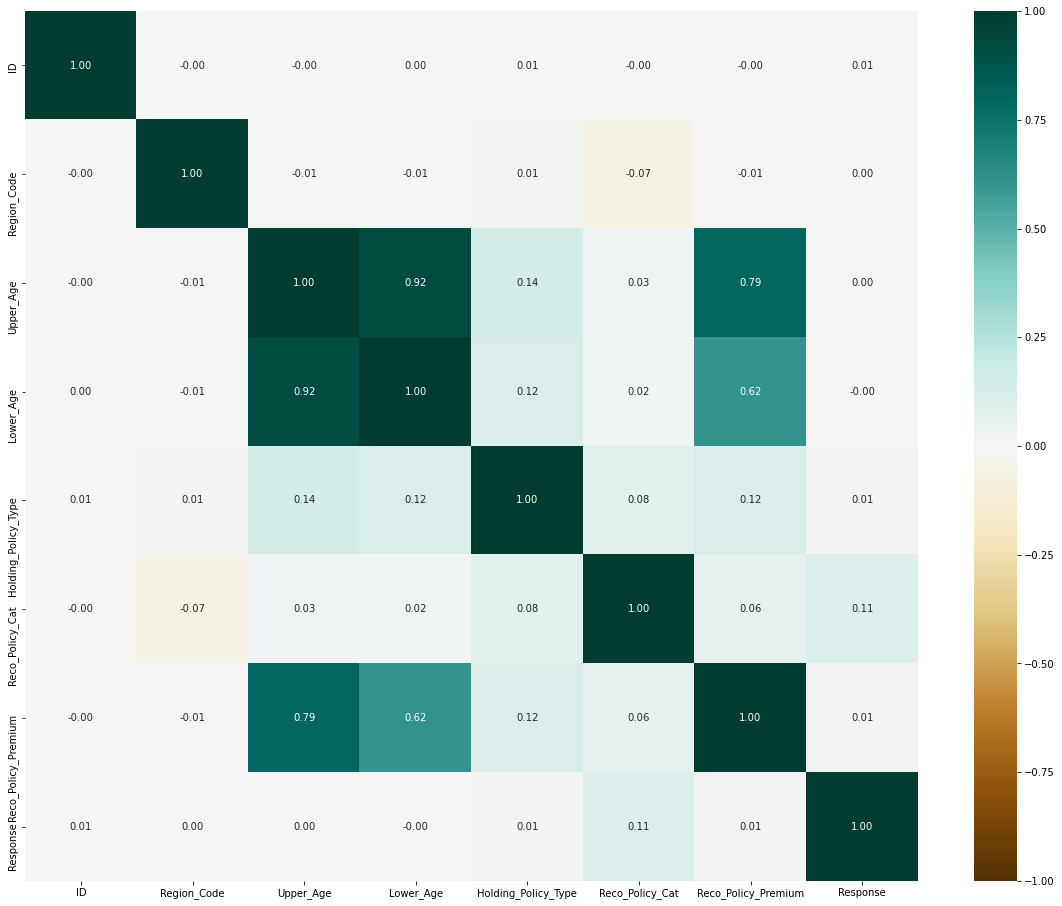

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))

sns.heatmap(df.corr(), 
            annot = True,
            cmap="BrBG",
            vmin=-1, vmax=1,
            center= 0,
            fmt='.2f'
           )

(array([1389., 4362., 4757., 3438., 2782., 2428., 1462., 2166., 2439.,
        2415., 2424., 2482., 2512., 1608., 2334., 2235., 2219., 1756.,
        1754., 3920.]),
 array([18.  , 20.85, 23.7 , 26.55, 29.4 , 32.25, 35.1 , 37.95, 40.8 ,
        43.65, 46.5 , 49.35, 52.2 , 55.05, 57.9 , 60.75, 63.6 , 66.45,
        69.3 , 72.15, 75.  ]),
 <BarContainer object of 20 artists>)

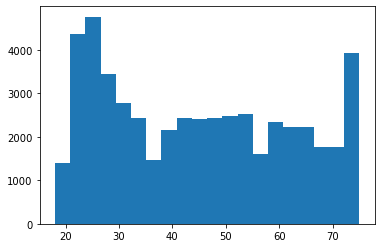

In [10]:
plt.hist(df['Upper_Age'],bins=20)

(array([ 848., 3079., 5342., 4697., 3421., 2802., 2407., 2152., 2202.,
        2235., 2279., 2244., 2296., 2350., 2168., 2107., 2105., 1574.,
        1535., 3039.]),
 array([16.  , 18.95, 21.9 , 24.85, 27.8 , 30.75, 33.7 , 36.65, 39.6 ,
        42.55, 45.5 , 48.45, 51.4 , 54.35, 57.3 , 60.25, 63.2 , 66.15,
        69.1 , 72.05, 75.  ]),
 <BarContainer object of 20 artists>)

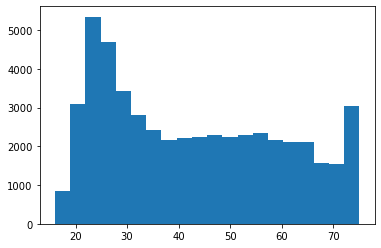

In [11]:
plt.hist(df['Lower_Age'],bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


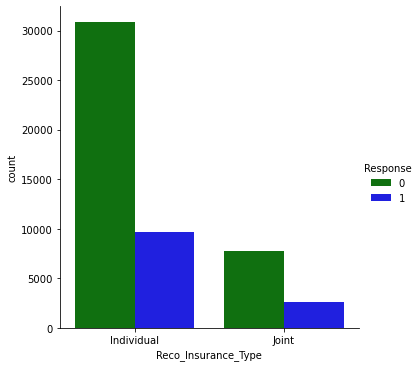

In [84]:
sns.catplot("Reco_Insurance_Type", hue="Response", data=df, kind="count", 
            palette={1:"blue", 0:"green"})

In [ ]:
df['Reco_Insurance_Type'].value_counts

In [143]:
df1 = df.dropna()

In [144]:
df1.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [145]:
df1.shape

(30631, 14)

In [14]:
df1.shape

(23548, 14)

In [146]:
#Returns dataframe with only categorical columns
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include=['object','category']).columns
    return dataset[cat_columns]
check_categorical(df1)

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,Rented,Individual,No,X1,15
2,Owned,Individual,No,Unknown,1.0
3,Owned,Joint,No,X1,15
4,Rented,Individual,No,X2,3.0
5,Rented,Individual,No,X2,5.0
...,...,...,...,...,...
50876,Owned,Individual,No,Unknown,2.0
50878,Rented,Individual,No,X3,7.0
50879,Rented,Individual,No,X2,15
50880,Owned,Joint,No,X2,2.0


In [147]:
#Returns dataframe with only numerical columns
def check_numerical(dataset):
    num_columns = dataset.select_dtypes(include=np.number).columns
    return dataset[num_columns]
check_numerical(df1)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,3213,36,36,3.0,22,11628.0,0
2,3,5,3732,32,32,1.0,19,7450.0,1
3,4,24,4378,52,48,3.0,19,17780.0,0
4,5,8,2190,44,44,1.0,16,10404.0,0
5,6,9,1785,52,52,1.0,22,15264.0,1
...,...,...,...,...,...,...,...,...,...
50876,50877,26,579,37,37,1.0,12,13222.0,0
50878,50879,5,4188,27,27,3.0,4,5408.0,0
50879,50880,1,442,63,63,1.0,12,11374.0,0
50880,50881,1,4,71,49,2.0,16,28179.2,1


In [113]:
df1[['Upper_Age','Lower_Age','Reco_Insurance_Type']].head(30)

,Upper_Age,Lower_Age,Reco_Insurance_Type
0,36,36,Individual
2,32,32,Individual
3,52,48,Joint
4,44,44,Individual
5,52,52,Individual
7,75,73,Joint
8,52,43,Joint
9,59,26,Joint
11,59,47,Joint
12,66,66,Individual


In [148]:
#Returns skew() values for each continous feature:
def check_skewness(dataset):
    numerical_df = check_numerical(dataset)
    for i in numerical_df.columns:
        print(i,numerical_df[i].skew())
check_skewness(df1)

ID 0.004004059958421146
City_Code 1.2281779761465357
Region_Code 0.8055678690441744
Upper_Age 0.03250710150065769
Lower_Age 0.10574603144258786
Holding_Policy_Type -0.19889541430346727
Reco_Policy_Cat -0.9488121109876582
Reco_Policy_Premium 0.7203470690263877
Response 1.2137369160343252


In [122]:
df['Region_Code'].value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

In [124]:
# df.groupby(['Region_code','Response'])['Response'].count()

In [125]:
# cols =  ['Region_code']
# for col in cols:
#   print('Total unique'+col  +' values in Train are {}'.format(df[col].nunique()))

In [120]:
# df.groupby(['Region_code','Response'])['Response'].count()

In [126]:
# cols = ['ID']
# for col in cols:
#   print('Total unique'+col  +' values in Train are {}'.format(df[col].nunique()))

In [18]:
check_categorical(df1).columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [149]:
f_df = pd.get_dummies(df1,columns=['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],drop_first=True)

In [150]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30631 entries, 0 to 50881
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            30631 non-null  int64  
 1   City_Code                     30631 non-null  int64  
 2   Region_Code                   30631 non-null  int64  
 3   Upper_Age                     30631 non-null  int64  
 4   Lower_Age                     30631 non-null  int64  
 5   Holding_Policy_Type           30631 non-null  float64
 6   Reco_Policy_Cat               30631 non-null  int64  
 7   Reco_Policy_Premium           30631 non-null  float64
 8   Response                      30631 non-null  int64  
 9   Accomodation_Type_Rented      30631 non-null  uint8  
 10  Reco_Insurance_Type_Joint     30631 non-null  uint8  
 11  Is_Spouse_Yes                 30631 non-null  uint8  
 12  Health Indicator_X1           30631 non-null  uint8  
 13  H

In [151]:
x1 = f_df.drop(['Response'],axis=1)
y1 = f_df['Response']

In [152]:
x1.shape

(30631, 34)

[0.11391824 0.09870441 0.11456433 0.09740272 0.09766477 0.05221107
 0.10460659 0.11174025 0.02493902 0.00898504 0.00954924 0.01685327
 0.01743276 0.01245641 0.01316748 0.00501547 0.00529858 0.00133762
 0.00087016 0.00062305 0.00646738 0.00398262 0.00465787 0.00449814
 0.00321843 0.00401864 0.01049578 0.0080346  0.00992887 0.00891998
 0.00867663 0.00712938 0.0063966  0.0062346 ]


<AxesSubplot:>

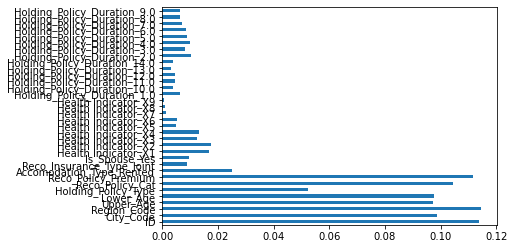

In [153]:
from sklearn.ensemble import ExtraTreesClassifier

model_features_importance = ExtraTreesClassifier()
model_features_importance.fit(x1,y1)
print(model_features_importance.feature_importances_)
ranked_features = pd.Series(model_features_importance.feature_importances_,index=x1.columns)
# ranked_features.nlargest(40).plot(kind='barh')
ranked_features.plot(kind='barh')

In [154]:
f = ranked_features.nlargest(20).index

In [155]:
df2 = f_df[f]
df2

,Region_Code,ID,Reco_Policy_Premium,Reco_Policy_Cat,City_Code,Lower_Age,Upper_Age,Holding_Policy_Type,Accomodation_Type_Rented,Health Indicator_X2,Health Indicator_X1,Health Indicator_X4,Health Indicator_X3,Holding_Policy_Duration_2.0,Holding_Policy_Duration_4.0,Is_Spouse_Yes,Reco_Insurance_Type_Joint,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_3.0
0,3213,1,11628.0,22,3,36,36,3.0,1,0,1,0,0,0,0,0,0,0,0,0
2,3732,3,7450.0,19,5,32,32,1.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4378,4,17780.0,19,24,48,52,3.0,0,0,1,0,0,0,0,0,1,0,0,0
4,2190,5,10404.0,16,8,44,44,1.0,1,1,0,0,0,0,0,0,0,0,0,1
5,1785,6,15264.0,22,9,52,52,1.0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50876,579,50877,13222.0,12,26,37,37,1.0,0,0,0,0,0,1,0,0,0,0,0,0
50878,4188,50879,5408.0,4,5,27,27,3.0,1,0,0,0,1,0,0,0,0,0,0,0
50879,442,50880,11374.0,12,1,63,63,1.0,1,1,0,0,0,0,0,0,0,0,0,0
50880,4,50881,28179.2,16,1,49,71,2.0,0,1,0,0,0,1,0,0,1,0,0,0


In [156]:
df2 = f_df[f]
X = df2
y = f_df['Response']

In [157]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score

X_train, X_test,y_train, y_test = tts(X,y, test_size=0.10, random_state=43)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_pred = forest_clf.predict(X_test)
score = roc_auc_score(y_test, forest_clf.predict_proba(X_test)[:, 1])
print("score:",score)

score: 0.6131861490329921


In [158]:
from lightgbm import LGBMClassifier
for seed_val in [1,3,10,15,20,33,333,1997,2020,2021]:
    print(seed_val)
    clf = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=20,
                     random_state=seed_val,
                     colsample_bytree=1,
                     reg_alpha=2,
                     reg_lambda=2,class_weight={0:0.35,1:0.65})
    clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=50,
        eval_metric = 'auc', early_stopping_rounds = 100)
    preds = clf.predict_proba(X_test)[:, 1]

1
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.680406	valid_0's binary_logloss: 0.55184
[100]	valid_0's auc: 0.685288	valid_0's binary_logloss: 0.545403
[150]	valid_0's auc: 0.683381	valid_0's binary_logloss: 0.543684
[200]	valid_0's auc: 0.6829	valid_0's binary_logloss: 0.542332
Early stopping, best iteration is:
[106]	valid_0's auc: 0.686244	valid_0's binary_logloss: 0.544802
3
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.680406	valid_0's binary_logloss: 0.55184
[100]	valid_0's auc: 0.685288	valid_0's binary_logloss: 0.545403
[150]	valid_0's auc: 0.683381	valid_0's binary_logloss: 0.543684
[200]	valid_0's auc: 0.6829	valid_0's binary_logloss: 0.542332
Early stopping, best iteration is:
[106]	valid_0's auc: 0.686244	valid_0's binary_logloss: 0.544802
10
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.680406	valid_0's binary_logloss: 0.55184
[100]	valid_0's auc: 0.685288	va